# EDA on Chase Bank Branch Deposits

# Content

This dataset includes a record for every branch of Chase Bank in the United States, including the branch's name and number, date established as a bank office and (if applicable) acquired by JP Morgan Chase, physical location as street address, city, state, zip, and latitude and longitude coordinates, and the amount deposited at the branch (or the institution, for the bank's main office) between July 1 and June 30, 2016, in US dollars.


# Data Source

The location data was scraped from the Chase Bank website. The deposit data was compiled from the Federal Deposit Insurance Corporation's annual Summary of Deposits reports. This perticular data was taken from the Kaggle Link :- https://www.kaggle.com/chasebank/bank-deposits


# EDA Ideas

* Where did Chase Bank customers deposit the most money last year?
* Which bank branch has seen the most growth in deposits?
* How did the bank network of branch locations grow over the past century?
* What city has the most bank branches per capita?

In [2]:
import numpy as np # linear algebra
import pandas_profiling
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for Plotting
%matplotlib inline
import seaborn as sns #for graphing
import collections
local_path = "C:/Users/Aravind/Desktop/UpX Academy/Data Science Track - 01/PROJECTS TO BE DOING/Project Datasets/Project_Bank/Chase bank-deposits/database.csv"
input_data = pd.read_csv(local_path)                           #load CSV file from local directory
input_data.head()                                         # Preview the first 5 lines of the loaded data

,Institution Name,Main Office,Branch Name,Branch Number,Established Date,Acquired Date,Street Address,City,County,State,Zipcode,Latitude,Longitude,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits
0,JPMorgan Chase Bank,1,JPMorgan Chase Bank Main Office,0,01/01/1824,NaN,1111 Polaris Parkway,Columbus,Delaware,OH,43240,40.14453,-82.99115,633131000.0,743268000.0,832455000.0,916543000.0,1.032549e+09,1.069425e+09,1155185000
1,JPMorgan Chase Bank,0,Vernon Hills Scarsdale Branch,2,03/20/1961,NaN,676 White Plains Road,Scarsdale,Westchester,NY,10583,40.97008,-73.80670,293229.0,310791.0,325742.0,327930.0,3.277920e+05,3.414750e+05,381558
2,JPMorgan Chase Bank,0,Great Neck Northern Boulevard Branch,3,09/09/1963,NaN,410 Northern Boulevard,Great Neck,Nassau,NY,11021,40.77944,-73.72240,191011.0,206933.0,216439.0,237983.0,2.341830e+05,2.624550e+05,278940
3,JPMorgan Chase Bank,0,North Hartsdale Branch,4,02/19/1966,NaN,353 North Central Avenue,Hartsdale,Westchester,NY,10530,41.02654,-73.79168,87110.0,88367.0,93163.0,109659.0,1.119850e+05,1.167720e+05,140233
4,JPMorgan Chase Bank,0,Lawrence Rockaway Branch,5,01/16/1965,NaN,335 Rockaway Turnpike,Lawrence,Nassau,NY,11559,40.62715,-73.73675,172608.0,172749.0,189413.0,198445.0,2.051980e+05,2.232000e+05,235594


In [3]:
eda = pandas_profiling.ProfileReport(input_data)
eda

Number of variables,20
Number of observations,5413
Total Missing (%),1.6%
Total size in memory,845.9 KiB
Average record size in memory,160.0 B
Numeric,4
Categorical,7
Boolean,1
Date,0
Text (Unique),0
Rejected,8


In [4]:
df_chase = pd.DataFrame(input_data) 
df_chase.isnull().sum()          

Institution Name       0
Main Office            0
Branch Name            0
Branch Number          0
Established Date       0
Acquired Date       1615
Street Address         0
City                   0
County                 0
State                  0
Zipcode                0
Latitude              66
Longitude             66
2010 Deposits        740
2011 Deposits        578
2012 Deposits        329
2013 Deposits        175
2014 Deposits         56
2015 Deposits         19
2016 Deposits          0
dtype: int64

In [5]:
## Drop columns which are not required for the EDA.  
df_chase.drop(['Main Office','Branch Number','Established Date',
               'Acquired Date','Street Address','Zipcode','Latitude','Longitude'], axis=1, inplace=True) 

In [6]:
df_chase['2016 Deposits'] = df_chase['2016 Deposits'].astype(float)
df_chase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5413 entries, 0 to 5412
Data columns (total 12 columns):
Institution Name    5413 non-null object
Branch Name         5413 non-null object
City                5413 non-null object
County              5413 non-null object
State               5413 non-null object
2010 Deposits       4673 non-null float64
2011 Deposits       4835 non-null float64
2012 Deposits       5084 non-null float64
2013 Deposits       5238 non-null float64
2014 Deposits       5357 non-null float64
2015 Deposits       5394 non-null float64
2016 Deposits       5413 non-null float64
dtypes: float64(7), object(5)
memory usage: 507.5+ KB


# Fill null values

In [7]:
cols = ['2010 Deposits','2011 Deposits','2012 Deposits','2013 Deposits','2014 Deposits','2015 Deposits','2016 Deposits']
df_chase[cols] = df_chase[cols].fillna(0)

In [38]:
df_chase.isnull().sum()
df_chase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5413 entries, 0 to 5412
Data columns (total 12 columns):
Institution Name    5413 non-null object
Branch Name         5413 non-null object
City                5413 non-null object
County              5413 non-null object
State               5413 non-null object
2010 Deposits       5413 non-null float64
2011 Deposits       5413 non-null float64
2012 Deposits       5413 non-null float64
2013 Deposits       5413 non-null float64
2014 Deposits       5413 non-null float64
2015 Deposits       5413 non-null float64
2016 Deposits       5413 non-null float64
dtypes: float64(7), object(5)
memory usage: 507.5+ KB



## 1) Where did Chase Bank customers deposit the most money last year?

In [83]:
# Most money deposited by State
state =  df_chase.groupby('State')['2016 Deposits'].sum().sort_values(ascending=False)
state
# Ohio state has most amount deposited in the Year 2016.

State
OH    1.183589e+09
NY    5.367528e+08
TX    1.513938e+08
CA    1.189587e+08
IL    8.440550e+07
MI    4.200621e+07
AZ    3.012693e+07
FL    2.883678e+07
NJ    1.924947e+07
IN    1.788776e+07
LA    1.758922e+07
WA    1.519166e+07
UT    1.270922e+07
CO    1.152879e+07
WI    9.410758e+06
OR    6.099453e+06
KY    5.667540e+06
CT    5.533022e+06
OK    4.857743e+06
GA    3.179306e+06
NV    2.909706e+06
WV    1.812236e+06
ID    6.739640e+05
DC    0.000000e+00
PA    0.000000e+00
MA    0.000000e+00
Name: 2016 Deposits, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

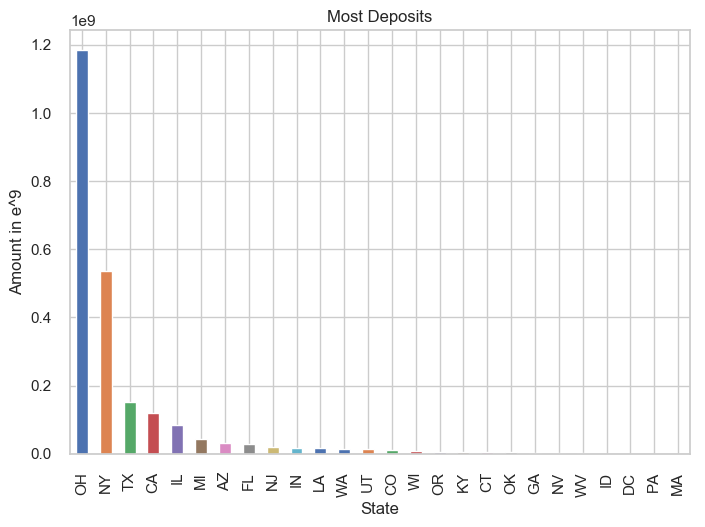

In [109]:
state.plot(kind ='bar', title = 'Most Deposits')
plt.ylabel('Amount in e^9')
plt.show

In [124]:
# Most money deposited by City
city =  df_chase.groupby('City')['2016 Deposits'].sum().sort_values(ascending=False)
city.head(10)

# City Columbus has most amount deposited in the Year 2016.

City
Columbus          1.165474e+09
New York City     4.549220e+08
Houston           7.442017e+07
Chicago           4.997336e+07
Dallas            3.156900e+07
Detroit           2.025068e+07
Brooklyn          1.416018e+07
Phoenix           1.215515e+07
Salt Lake City    1.035105e+07
Los Angeles       1.018958e+07
Name: 2016 Deposits, dtype: float64

In [ ]:
city.plot(kind ='bar', title = 'Most Deposits')
plt.ylabel('Amount in e^9')
plt.show

In [125]:
# Most money deposited by County.
county =  df_chase.groupby('County')['2016 Deposits'].sum().sort_values(ascending=False)
county.head(10)

# Delaware county has most amount deposited in the Year 2016.

County
Delaware       1.156320e+09
New York       4.544063e+08
Harris         7.821389e+07
Cook           6.628701e+07
Los Angeles    4.196384e+07
Dallas         3.961928e+07
Wayne          2.505381e+07
Maricopa       2.285962e+07
Orange         1.614785e+07
Nassau         1.511593e+07
Name: 2016 Deposits, dtype: float64

In [126]:
# Most money deposited by Branch.
branch =  df_chase.groupby('Branch Name')['2016 Deposits'].sum().sort_values(ascending=False)
branch.head(10)

# JPMorgan Chase Bank Main Office has most amount deposited in the Year 2016.

Branch Name
JPMorgan Chase Bank Main Office      1.155185e+09
Madison and 48th St Branch           3.136869e+08
Madison Ave Abd 48th St Branch       6.904479e+07
Houston Main Office                  5.782058e+07
Chicago's Main Office Branch         3.653903e+07
Dallas Main Banking Center Branch    2.541479e+07
Detroit Main Branch                  1.949950e+07
Empire State Branch                  1.558090e+07
One Utah Branch                      9.138734e+06
Broad St Downtown Branch             8.142300e+06
Name: 2016 Deposits, dtype: float64

### 2) Which bank branch has seen the most growth in deposits?

In [ ]:
df_2010_11 = pd.DataFrame(df, columns = ['Branch Name', '2010 Deposits', '2011 Deposits'])
df_2010_11['diff_2010_11'] = df['2010 Deposits'] - df['2011 Deposits']
df_2010_11['diff_2010_11']

In [ ]:
df_city
df_2010_11 = pd.DataFrame(df, columns= ['2010 Deposits','2011 Deposits'])
df_2010_11_pct = ((df_2010_11['2011 Deposits'] - df_2010_11['2010 Deposits'])/(df_2010_11['2010 Deposits']))*100
input_data[['Branch Name']] + df_2010_11_pct 

### 3) How did the bank network of branch locations grow over the past century?


In [ ]:
df_city = df.pivot(columns = 'Branch Name', values = ('2010 Deposits', '2011 Deposits')).sum()
df_city

### 4) What city has the most bank branches per capita?